### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn import metrics

from sklearn.cluster import KMeans
# importing ploting libraries
import matplotlib.pyplot as plt   
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OneHotEncoder

In [30]:
df = pd.read_csv("vehicle.csv")

In [31]:
df.shape

(846, 19)

In [32]:
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [33]:
df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [34]:
df.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [35]:
df2 = df.dropna()

In [36]:
df2.shape

(813, 19)

In [37]:
df2.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

In [38]:
df2['class'].value_counts()

car    413
bus    205
van    195
Name: class, dtype: int64

### Check for any missing values in the data 

In [39]:
df2.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [40]:
df2.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

## No missing value in this data set now

### 3. Standardize the data 

In [41]:
#one hot encoding
one_hot = pd.get_dummies(df2['class'])

In [42]:
one_hot.shape

(813, 3)

In [43]:
df2 = df2.drop('class', axis=1) 

In [44]:
df2 = df2.join(one_hot)

In [45]:
df2.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,...,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,bus,car,van
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,...,379.0,184.0,70.0,6.0,16.0,187.0,197,0,0,1
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,...,330.0,158.0,72.0,9.0,14.0,189.0,199,0,0,1
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,...,635.0,220.0,73.0,14.0,9.0,188.0,196,0,1,0
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,...,309.0,127.0,63.0,6.0,10.0,199.0,207,0,0,1
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,...,325.0,188.0,127.0,9.0,11.0,180.0,183,1,0,0


In [46]:
df2.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
bus                              uint8
car                              uint8
van                              uint8
dtype: object

In [47]:
# df2_feature = df2.drop(labels = "class", axis = 1)

In [48]:
# df2_label = df2.pop("class")

In [49]:
# df2_feature.shape

In [50]:
# df2_label.shape

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [51]:
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always advised to scale numeric attributes in models that calculate distances.

from scipy.stats import zscore
df2_z = df2.apply(zscore)
df2_z.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,...,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,bus,car,van
count,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,...,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02
mean,-2.425284e-16,-4.642999e-16,-2.351542e-16,3.665238e-16,-2.047016e-16,-1.349201e-16,3.714399e-16,-2.062038e-16,-2.651972e-16,-7.398756e-16,...,-3.550529e-17,3.348422e-16,1.312159e-16,-1.693329e-17,9.845889e-17,-1.169490e-15,3.482249e-16,4.642999e-18,-1.900898e-16,-2.534531e-16
std,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,...,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00
min,-2.510344e+00,-1.921444e+00,-2.665447e+00,-1.937757e+00,-1.854258e+00,-1.411767e+00,-1.710835e+00,-1.922008e+00,-1.383740e+00,-2.062109e+00,...,-1.452266e+00,-2.019423e+00,-1.793474e+00,-1.291420e+00,-1.422141e+00,-2.110457e+00,-1.992013e+00,-5.806643e-01,-1.016120e+00,-5.617241e-01
25%,-8.089782e-01,-7.819133e-01,-7.635057e-01,-8.363933e-01,-5.992534e-01,-3.420870e-01,-6.824590e-01,-1.024408e+00,-6.060138e-01,-7.513773e-01,...,-6.872619e-01,-7.815035e-01,-7.227236e-01,-8.847879e-01,-7.496057e-01,-8.096219e-01,-6.396066e-01,-5.806643e-01,-1.016120e+00,-5.617241e-01
50%,-7.982157e-02,-1.307527e-01,-1.929234e-01,-6.246222e-02,-9.725132e-02,-1.281510e-01,-3.497491e-01,2.578765e-01,-2.171510e-01,-1.305046e-01,...,-4.246486e-01,-3.875161e-02,-1.873484e-01,-7.152328e-02,-1.891593e-01,3.400092e-03,1.718371e-01,-5.806643e-01,9.841357e-01,-5.617241e-01
75%,7.708611e-01,6.831980e-01,1.011639e+00,7.710020e-01,4.047507e-01,2.997208e-01,8.903515e-01,6.425619e-01,9.494376e-01,7.663115e-01,...,8.427456e-01,7.349483e-01,3.480268e-01,5.384252e-01,7.075550e-01,6.538177e-01,7.127995e-01,1.722165e+00,9.841357e-01,-5.617241e-01
max,3.079857e+00,2.311100e+00,1.899212e+00,4.878790e+00,9.566288e+00,9.926837e+00,2.916857e+00,2.565989e+00,3.282615e+00,2.766901e+00,...,3.309026e+00,2.901308e+00,8.378655e+00,3.181535e+00,3.173519e+00,2.767675e+00,2.065206e+00,1.722165e+00,9.841357e-01,1.780233e+00


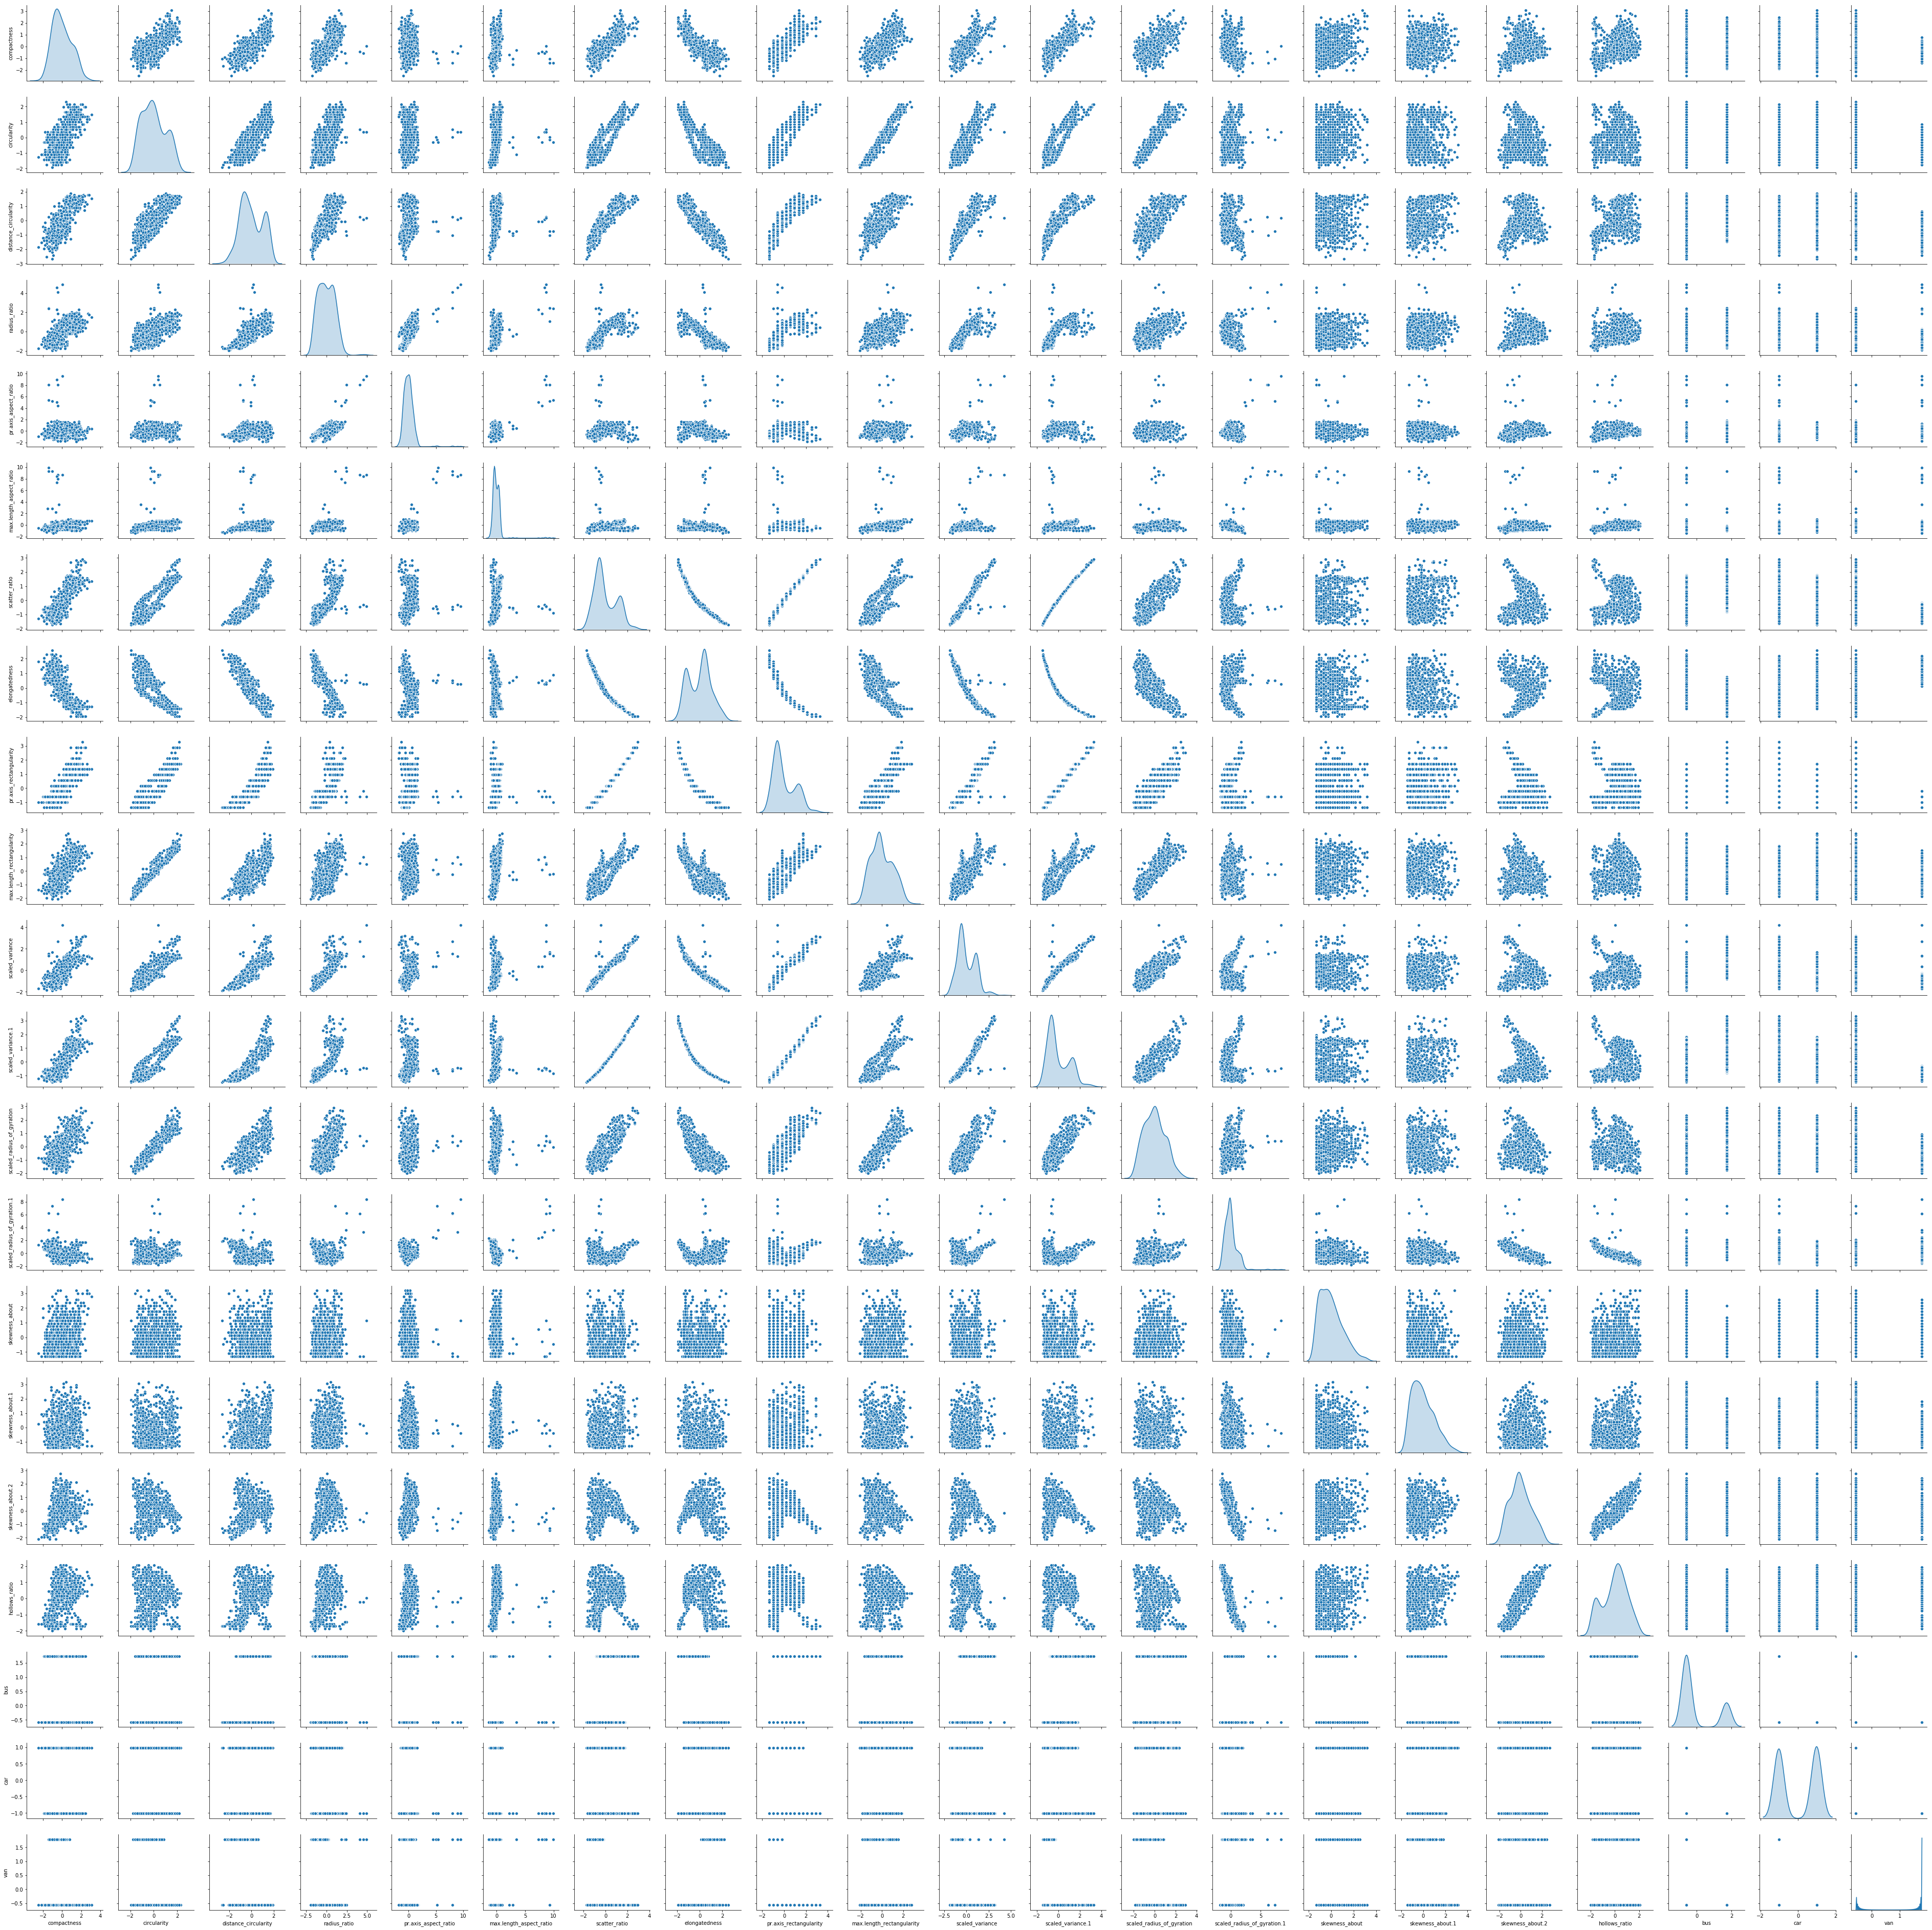

In [52]:
sns.pairplot(df2_z,diag_kind='kde')

### K - Means Clustering

### 4. Assign a dummy array called distortion

In [53]:
distortions = []

You can later use this array to plot the elbow plot

### 5. Calculating distortion - C distance

Iterating values of k from 1 to 10 fit K means model
Using c distance - Get the measure for Sum of squares error.

In [54]:
cluster_range = range( 2, 10)   
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(df2_z)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  distortions.append( clusters.inertia_ )    # capture the intertia
  cluster_sil_scores.append(metrics.silhouette_score(df2_z, labels, metric='euclidean'))




# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": distortions , "Avg Sil Score": cluster_sil_scores } )
clusters_df[0:15]

,num_clusters,cluster_errors,Avg Sil Score
0,2,10769.966492,0.349684
1,3,9186.945592,0.255045
2,4,8210.066594,0.264319
3,5,6902.221183,0.276277
4,6,6250.366758,0.287368
5,7,5677.880078,0.299960
6,8,5323.340604,0.243774
7,9,4682.427272,0.305964


### 6. Plotting Elbow/ Scree Plot

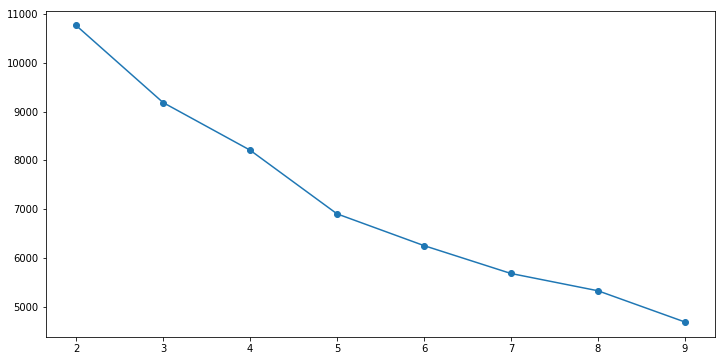

In [55]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

### Find out the optimal value of K

the optimal value of k is 5 as that is where the elbow plot turns

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [57]:
cluster = KMeans( n_clusters = 5, random_state = 1 )
cluster.fit(df2_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [59]:
cluster.cluster_centers_

array([[-3.47327186e-01, -3.80893696e-01, -4.31052611e-01,
        -6.61786919e-01, -1.61532068e-01,  7.01310340e-02,
        -7.69325047e-01,  8.02065670e-01, -7.26940695e-01,
        -9.39084528e-02, -7.94808513e-01, -7.60086199e-01,
        -5.01273185e-01, -3.03237560e-01, -8.58511091e-04,
        -3.49091576e-01,  2.07647078e-01,  3.10376236e-01,
        -5.80664320e-01, -1.00392339e+00,  1.76595312e+00],
       [ 1.19443755e+00,  1.23168601e+00,  1.26207460e+00,
         9.78750545e-01,  7.45958541e-02,  2.43795641e-01,
         1.34781198e+00, -1.24362058e+00,  1.35927648e+00,
         1.15045682e+00,  1.24401196e+00,  1.36164718e+00,
         1.14189517e+00, -9.29357618e-02,  1.75661937e-01,
         2.80127404e-01, -4.72029361e-02,  1.80254544e-01,
        -2.17562539e-01,  6.68742642e-01, -5.61724114e-01],
       [-1.09832600e+00, -6.50130835e-01, -1.02950910e+00,
        -1.08271572e+00, -4.85705280e-01, -4.37169581e-01,
        -8.14966833e-01,  9.01054289e-01, -7.95301571e

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [81]:
# Let us put the raw centroid values into a dataframe under respective columns

centroid_df = pd.DataFrame(centroids, columns = list(df2_z) )
centroid_df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,...,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,bus,car,van
0,-1.194055,-0.183709,-0.855929,-0.941473,-0.234848,-0.272493,-0.564024,0.511244,-0.606014,-0.224425,...,-0.617034,0.045516,1.076911,-0.448760,-0.460604,-1.205358,-1.358174,1.722165,-1.016120,-0.561724
1,1.446850,1.486974,1.114661,0.636122,-0.544347,-0.636249,2.059562,-1.641508,2.116026,1.171603,...,2.262855,1.850043,1.259838,-0.039755,0.336259,-0.652099,-1.391882,1.722165,-1.016120,-0.561724
2,-1.010711,-1.096098,-1.242161,-1.286762,-0.792524,-0.573138,-1.075359,1.318326,-0.994877,-1.172881,...,-1.013587,-0.915818,0.777665,0.304612,-0.022146,-1.108814,-1.227903,-0.580664,0.384059,0.140863
3,0.011323,-0.332391,-0.398967,0.442217,0.861116,-0.502539,-0.167240,-0.119523,-0.252502,-0.470730,...,-0.158921,-0.335219,-0.232977,-0.323358,-0.271953,1.054785,0.537601,1.722165,-1.016120,-0.561724
4,-0.315969,0.063486,-0.131687,-0.655764,-0.187098,0.234081,-0.499606,0.460419,-0.477866,0.388457,...,-0.560626,-0.008155,0.141177,-0.113111,-0.320355,-0.488109,-0.123233,-0.580664,-1.016120,1.780233
5,-0.369088,-0.878212,-0.748326,-0.623835,-0.079575,-0.095006,-1.058621,1.151864,-0.994877,-0.627008,...,-0.971907,-1.059600,-0.867878,0.094566,-0.381763,1.093537,0.916613,-0.580664,-1.016120,1.780233
6,-0.214951,-0.642205,-0.064235,0.091702,-0.169367,-0.160082,-0.222444,0.055964,-0.266484,-0.689599,...,-0.264243,-0.602513,-0.794640,-0.060902,0.400564,0.730266,0.647198,-0.580664,0.984136,-0.561724
7,-0.733024,0.072735,-0.272171,2.947683,6.836652,8.696706,-0.535008,0.466248,-0.557406,0.283411,...,-0.588068,0.212701,4.965638,-0.274839,-0.231193,-0.707994,-0.453651,-0.004957,-1.016120,1.194744
8,1.155791,1.190262,1.292835,1.022380,0.145943,0.394917,1.226679,-1.171043,1.230386,1.149860,...,1.208612,1.019551,-0.339764,0.239774,0.273142,0.057861,0.456554,-0.580664,0.984136,-0.561724


Hint: Use pd.Dataframe function 

### Use kmeans.labels_ function to print out the labels of the classes

In [82]:
cluster.labels_

array([0, 0, 1, 0, 4, 3, 0, 0, 0, 3, 3, 0, 3, 1, 2, 3, 1, 2, 2, 3, 3, 1,
       0, 2, 1, 3, 2, 0, 3, 3, 1, 3, 2, 4, 1, 2, 1, 2, 0, 3, 1, 0, 0, 2,
       0, 3, 2, 3, 1, 3, 1, 0, 3, 0, 1, 2, 1, 2, 2, 2, 3, 2, 1, 0, 1, 1,
       3, 2, 0, 1, 3, 2, 2, 1, 0, 2, 3, 1, 0, 0, 3, 2, 1, 3, 1, 0, 2, 1,
       2, 2, 1, 2, 4, 0, 0, 0, 3, 1, 2, 2, 3, 0, 0, 2, 2, 0, 0, 1, 1, 3,
       2, 0, 0, 2, 0, 0, 2, 2, 0, 1, 1, 3, 3, 0, 1, 4, 0, 0, 2, 0, 3, 1,
       2, 3, 1, 0, 3, 3, 0, 1, 3, 3, 1, 0, 1, 3, 0, 3, 2, 1, 3, 2, 1, 1,
       3, 1, 2, 0, 1, 1, 0, 1, 0, 3, 3, 3, 0, 1, 2, 3, 2, 1, 3, 3, 3, 1,
       3, 3, 0, 1, 3, 2, 1, 2, 2, 2, 0, 3, 1, 1, 0, 0, 3, 2, 1, 3, 0, 3,
       1, 2, 2, 1, 2, 0, 1, 0, 2, 2, 0, 1, 0, 1, 2, 2, 2, 2, 1, 0, 0, 3,
       1, 2, 3, 3, 2, 1, 0, 0, 3, 3, 1, 2, 1, 0, 3, 0, 1, 3, 3, 1, 1, 2,
       3, 0, 0, 1, 2, 3, 0, 2, 2, 3, 0, 1, 3, 2, 2, 1, 3, 3, 2, 2, 1, 0,
       2, 1, 2, 0, 4, 2, 0, 1, 3, 1, 2, 3, 3, 1, 3, 3, 0, 2, 2, 1, 1, 1,
       1, 0, 2, 1, 2, 2, 0, 3, 2, 1, 1, 2, 1, 3, 2,

In [83]:
# label_df = pd.DataFrame(labels,columns=list(df2_feature_z))

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [84]:
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

In [85]:
a.shape

(100, 2)

In [86]:
b.shape

(50, 2)

In [87]:
c.shape

(100, 2)

### 9. Combine all three arrays a,b,c into a dataframe

In [88]:
d= np.concatenate((a,b,c), axis=0)

In [89]:
df_h = pd.DataFrame(d)

In [90]:
df_h.shape

(250, 2)

In [91]:
df_h.head()

,0,1
0,8.122613,1.495553
1,10.628871,1.920422
2,10.691761,0.095604
3,11.682031,3.449947
4,9.981146,-0.487636


### 10. Use scatter matrix to print all the 3 distributions

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a41631588>,
      dtype=object)

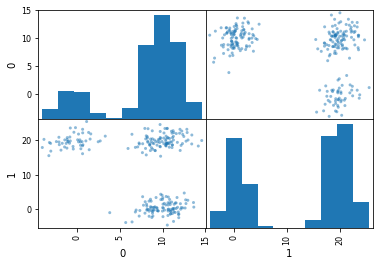

In [92]:
scatter_matrix(df_h)

In [93]:
from sklearn.cluster import AgglomerativeClustering 

In [94]:
model = AgglomerativeClustering(n_clusters=6, affinity='euclidean',  linkage='ward')

In [95]:
model.fit(df_h)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=6,
            pooling_func='deprecated')

In [96]:
df_h['labels'] = model.labels_

df_h.groupby(["labels"]).count()

,0,1
labels,,
0,50,50
1,60,60
2,44,44
3,40,40
4,23,23
5,33,33


### 11. Find out the linkage matrix

In [97]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

Use ward as linkage metric and distance as Eucledian

In [98]:
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [99]:

Z = linkage(df_h, 'ward')  #dendogramic distance
#Linkage matrix
Z

array([[1.96000000e+02, 1.97000000e+02, 1.79734382e-02, 2.00000000e+00],
       [1.74000000e+02, 1.79000000e+02, 4.23848840e-02, 2.00000000e+00],
       [3.70000000e+01, 9.30000000e+01, 5.24317457e-02, 2.00000000e+00],
       [1.63000000e+02, 1.71000000e+02, 6.29024200e-02, 2.00000000e+00],
       [1.64000000e+02, 2.49000000e+02, 6.51621394e-02, 2.00000000e+00],
       [3.80000000e+01, 8.80000000e+01, 7.79972085e-02, 2.00000000e+00],
       [7.70000000e+01, 9.40000000e+01, 9.09322374e-02, 2.00000000e+00],
       [1.12000000e+02, 1.19000000e+02, 9.43157695e-02, 2.00000000e+00],
       [1.30000000e+01, 4.80000000e+01, 9.45347692e-02, 2.00000000e+00],
       [1.84000000e+02, 2.40000000e+02, 9.55529035e-02, 2.00000000e+00],
       [2.00000000e+02, 2.50000000e+02, 1.05888803e-01, 3.00000000e+00],
       [1.20000000e+01, 4.40000000e+01, 1.06940278e-01, 2.00000000e+00],
       [1.50000000e+02, 2.13000000e+02, 1.08898830e-01, 2.00000000e+00],
       [1.60000000e+02, 1.88000000e+02, 1.14447091e

In [100]:
Z.shape

(249, 4)

### 12. Plot the dendrogram for the consolidated dataframe

In [101]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering


c, coph_dists = cophenet(Z , pdist(df_h))
c

0.9577965684815813

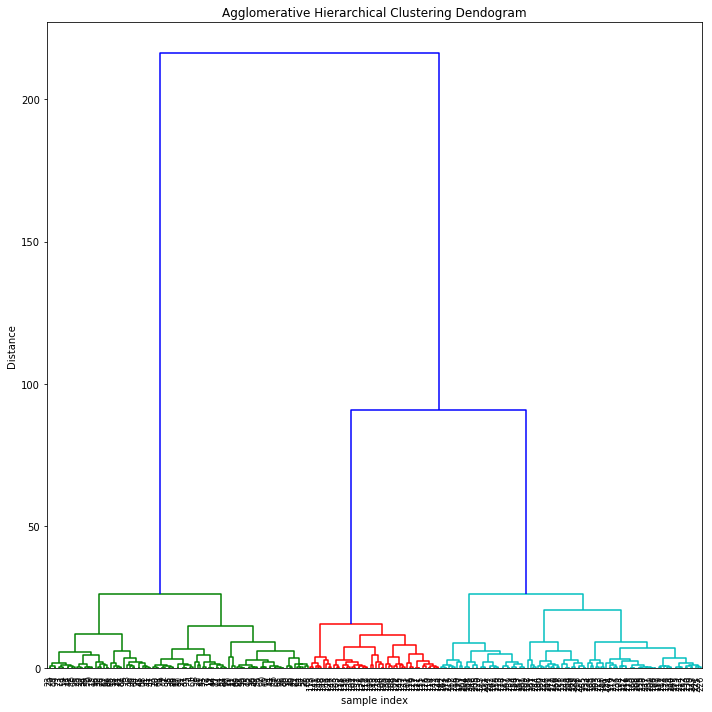

In [102]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 30, leaf_font_size=8. )
plt.tight_layout()

### 13. Recreate the dendrogram for last 12 merged clusters 

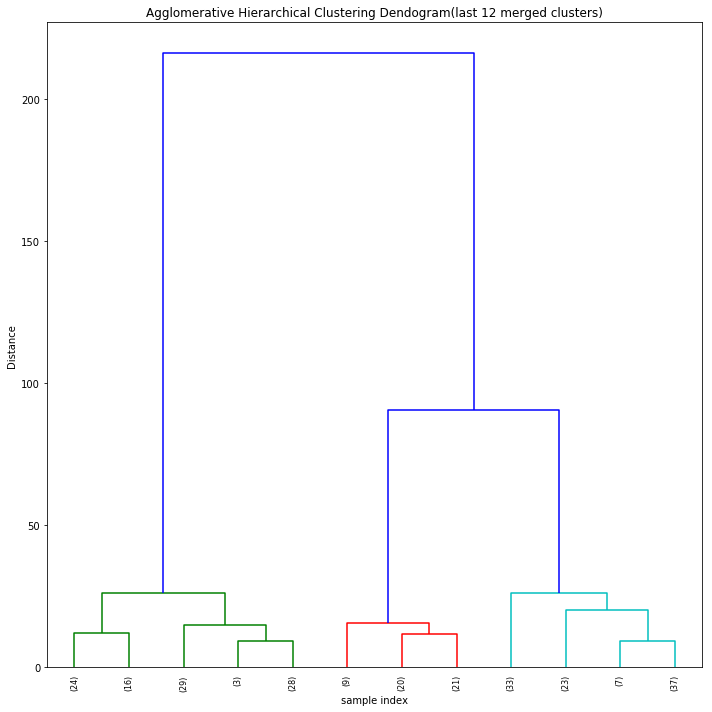

In [103]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram(last 12 merged clusters)')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, truncate_mode='lastp',p=12,leaf_rotation=90.,color_threshold = 30, leaf_font_size=8. )
plt.tight_layout()

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

### Use matplotlib to visually observe the clusters in 2D space 